# Clasificación de cancer con una red neuronal

En este notebook se va a desarrollar la implementación de una red neuronal de 3 capas, con 9 entredas, 15 neuronas en la capa oculta y una neurona con funcion de salida sigmoide en la última capa. El objetivo es determinar, partiendo de un csv, la naturaleza de los tumores en funcion de sus características.
Para el mejor entendimiento del ejercicio, el notebook se separa en dos secciones:
- Preparación de los datos.
- Instanciación de la red neuronal (desarrollada en NeuronalNetwork.py) y uso con los parámetros más óptimos encontrados.

## Preparación de los datos

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from NeuronalNetwork import *

### Load and format data

El dataset viene con la salida defindia como 2 ó 4, la cambiamos a 0 ó 1 para poder trabajar. También se eliminan aquellas filas con algún valor nulo. <br> Las entradas de la red neuronal corresponderán a: 
- Clump Thickness
- Uniformity of Cell Size
- Uniformity of Cell Shape
- Marginal Adhesion
- Single Epithelial Cell Size
- Bare Nuclei
- Bland Chromatin
- Normal Nucleoli 
- Mitoses

In [2]:
#load and format data
df = pd.read_csv('wisconsin-cancer-dataset.csv',header=None)
df.head(5)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


### Feature Normalization

Se normaliza las características para acotarlas todas en un intervalo entre 0 y 1, con el objetivo de que ninguna de ellas condicione en exceso el ejercicio o pase desapercibida. Se muestran los valores de las características. Para el desarrollo del ejercicio solo nos interesan las características del 1 al 9.

In [3]:
names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df[10]= df[10]
#scaled_df.iloc[0:13,1:11].plot.bar();
#scaled_df.iloc[0:13,1:11].plot.hist(alpha=0.5)

### Creation of train and validation sets

Para la posterior evalucaión de la clasificación, creamos un set de entrenamiento y otro menor de validación.

In [4]:
x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

## Netwotk Development [9-15-1]

### Declaring nn

Declaramos la red neuronal con los valores de entrenamiento y un learning rate de 0.02. La red funciona con una arquitectura [9 - 15 - 1], la cual utiliza funciones de salida lineales en la capa intermedia y una sigmoidal en la de salida. Utiliza como función de error, en lugar del clásico MSE, el Cross-Entropy. 
El algortimo de aprendizaje utilizado es el descenso por gradiente, el cual implementa el algoritmo de backpropagation.

Cost after iteration 0: 0.257234
Cost after iteration 100: 0.214368
Cost after iteration 200: 0.181792
Cost after iteration 300: 0.157165
Cost after iteration 400: 0.137801
Cost after iteration 500: 0.121914
Cost after iteration 600: 0.108492
Cost after iteration 700: 0.096992
Cost after iteration 800: 0.087109
Cost after iteration 900: 0.078645
Cost after iteration 1000: 0.071435
Cost after iteration 1100: 0.065327
Cost after iteration 1200: 0.060175
Cost after iteration 1300: 0.055846
Cost after iteration 1400: 0.052216
Cost after iteration 1500: 0.049177
Cost after iteration 1600: 0.046635
Cost after iteration 1700: 0.044506
Cost after iteration 1800: 0.042722
Cost after iteration 1900: 0.041223
Cost after iteration 2000: 0.039959
Cost after iteration 2100: 0.038890
Cost after iteration 2200: 0.037980
Cost after iteration 2300: 0.037202
Cost after iteration 2400: 0.036533
Cost after iteration 2500: 0.035952
Cost after iteration 2600: 0.035445
Cost after iteration 2700: 0.034998
Cost

Cost after iteration 22700: 0.028247
Cost after iteration 22800: 0.028234
Cost after iteration 22900: 0.028222
Cost after iteration 23000: 0.028210
Cost after iteration 23100: 0.028198
Cost after iteration 23200: 0.028187
Cost after iteration 23300: 0.028176
Cost after iteration 23400: 0.028165
Cost after iteration 23500: 0.028155
Cost after iteration 23600: 0.028144
Cost after iteration 23700: 0.028135
Cost after iteration 23800: 0.028125
Cost after iteration 23900: 0.028116
Cost after iteration 24000: 0.028107
Cost after iteration 24100: 0.028098
Cost after iteration 24200: 0.028090
Cost after iteration 24300: 0.028082
Cost after iteration 24400: 0.028074
Cost after iteration 24500: 0.028066
Cost after iteration 24600: 0.028059
Cost after iteration 24700: 0.028052
Cost after iteration 24800: 0.028045
Cost after iteration 24900: 0.028039
Cost after iteration 25000: 0.028033
Cost after iteration 25100: 0.028027
Cost after iteration 25200: 0.028021
Cost after iteration 25300: 0.028016
C

Cost after iteration 45200: 0.028660
Cost after iteration 45300: 0.028665
Cost after iteration 45400: 0.028671
Cost after iteration 45500: 0.028676
Cost after iteration 45600: 0.028681
Cost after iteration 45700: 0.028687
Cost after iteration 45800: 0.028692
Cost after iteration 45900: 0.028697
Cost after iteration 46000: 0.028703
Cost after iteration 46100: 0.028708
Cost after iteration 46200: 0.028714
Cost after iteration 46300: 0.028719
Cost after iteration 46400: 0.028724
Cost after iteration 46500: 0.028730
Cost after iteration 46600: 0.028735
Cost after iteration 46700: 0.028741
Cost after iteration 46800: 0.028746
Cost after iteration 46900: 0.028751
Cost after iteration 47000: 0.028757
Cost after iteration 47100: 0.028762
Cost after iteration 47200: 0.028768
Cost after iteration 47300: 0.028773
Cost after iteration 47400: 0.028779
Cost after iteration 47500: 0.028784
Cost after iteration 47600: 0.028789
Cost after iteration 47700: 0.028795
Cost after iteration 47800: 0.028800
C

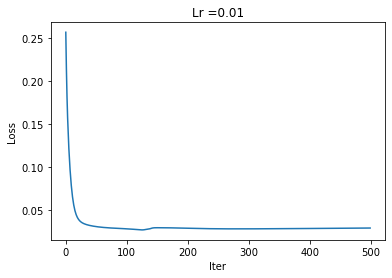

In [7]:
nn = NeuronalNetwork(x,y,0.01,[9,15,1],0.95)
nn.gradient_descent_regu(50000)

### Predict and comparing training acurrancy vs validation acurrancy

Comparamos el acierto desempeñado por nuestra red neuronal, tanto en el test de entrenamiento como en el de validación. Se prefiere un mejor resultado en el de validación que en el de entrenamiento, ya que esto es signo de que, a priori, no existe ningún tipo de problema de vias o de variance.

In [8]:
pred_train = nn.predict(x, y)
pred_test = nn.predict(xval, yval)

Acc: 0.9360000000000003
Acc: 1.0


### Function to plot the performance of the nn (skewed classes)

In [9]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('0         Predicted         1')
    plt.ylabel('1          Actual            0')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(np.ndarray([0,1]))
    plt.yticks(np.ndarray([0,1]))
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] > (cf.max()*0.7) else 'black')
    plt.show();


### Check how well it predict!

Dado los buenos resultados obtenidos, se procede a hacer la predicción, tanto con los datos de entrenamiento como con los de validación. 

Acc: 0.9360000000000003


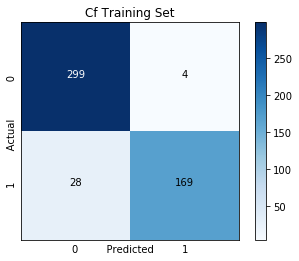

Acc: 1.0


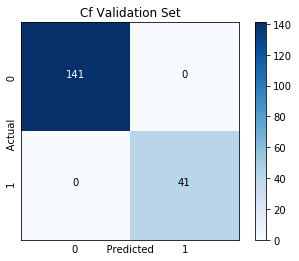

In [10]:
nn.threshold=0.90#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')

## Netwotk Development [9-10-1]

Cost after iteration 0: 0.267996
Cost after iteration 100: 0.233936
Cost after iteration 200: 0.205688
Cost after iteration 300: 0.180966
Cost after iteration 400: 0.159346
Cost after iteration 500: 0.141093
Cost after iteration 600: 0.126031
Cost after iteration 700: 0.113381
Cost after iteration 800: 0.102389
Cost after iteration 900: 0.092672
Cost after iteration 1000: 0.084108
Cost after iteration 1100: 0.076640
Cost after iteration 1200: 0.070194
Cost after iteration 1300: 0.064669
Cost after iteration 1400: 0.059950
Cost after iteration 1500: 0.055926
Cost after iteration 1600: 0.052493
Cost after iteration 1700: 0.049561
Cost after iteration 1800: 0.047051
Cost after iteration 1900: 0.044899
Cost after iteration 2000: 0.043048
Cost after iteration 2100: 0.041452
Cost after iteration 2200: 0.040073
Cost after iteration 2300: 0.038878
Cost after iteration 2400: 0.037840
Cost after iteration 2500: 0.036935
Cost after iteration 2600: 0.036144
Cost after iteration 2700: 0.035450
Cost

Cost after iteration 22600: 0.027599
Cost after iteration 22700: 0.027599
Cost after iteration 22800: 0.027600
Cost after iteration 22900: 0.027600
Cost after iteration 23000: 0.027601
Cost after iteration 23100: 0.027601
Cost after iteration 23200: 0.027602
Cost after iteration 23300: 0.027602
Cost after iteration 23400: 0.027603
Cost after iteration 23500: 0.027603
Cost after iteration 23600: 0.027604
Cost after iteration 23700: 0.027604
Cost after iteration 23800: 0.027605
Cost after iteration 23900: 0.027605
Cost after iteration 24000: 0.027606
Cost after iteration 24100: 0.027606
Cost after iteration 24200: 0.027607
Cost after iteration 24300: 0.027607
Cost after iteration 24400: 0.027607
Cost after iteration 24500: 0.027608
Cost after iteration 24600: 0.027608
Cost after iteration 24700: 0.027608
Cost after iteration 24800: 0.027609
Cost after iteration 24900: 0.027609
Cost after iteration 25000: 0.027609
Cost after iteration 25100: 0.027609
Cost after iteration 25200: 0.027609
C

Cost after iteration 45600: 0.029571
Cost after iteration 45700: 0.029595
Cost after iteration 45800: 0.029619
Cost after iteration 45900: 0.029643
Cost after iteration 46000: 0.029666
Cost after iteration 46100: 0.029690
Cost after iteration 46200: 0.029714
Cost after iteration 46300: 0.029738
Cost after iteration 46400: 0.029761
Cost after iteration 46500: 0.029785
Cost after iteration 46600: 0.029808
Cost after iteration 46700: 0.029831
Cost after iteration 46800: 0.029855
Cost after iteration 46900: 0.029878
Cost after iteration 47000: 0.029901
Cost after iteration 47100: 0.029924
Cost after iteration 47200: 0.029947
Cost after iteration 47300: 0.029969
Cost after iteration 47400: 0.029992
Cost after iteration 47500: 0.030014
Cost after iteration 47600: 0.030037
Cost after iteration 47700: 0.030059
Cost after iteration 47800: 0.030081
Cost after iteration 47900: 0.030103
Cost after iteration 48000: 0.030124
Cost after iteration 48100: 0.030146
Cost after iteration 48200: 0.030167
C

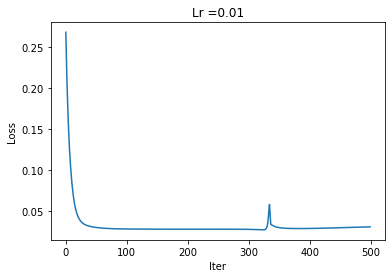

In [13]:
nn = NeuronalNetwork(x,y,0.01,[9,10,1],0.95)
nn.gradient_descent_regu(50000)

Acc: 0.9300000000000003


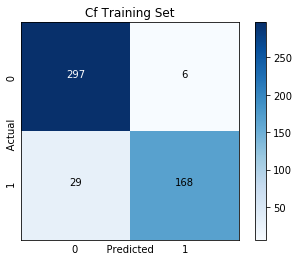

Acc: 0.9780219780219781


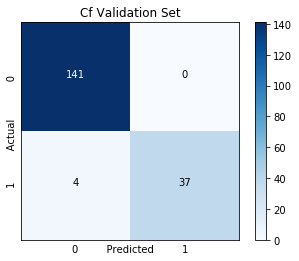

In [14]:
nn.threshold=0.90#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')

## Netwotk Development [9-7-1]

Cost after iteration 0: 0.283328
Cost after iteration 100: 0.234630
Cost after iteration 200: 0.198124
Cost after iteration 300: 0.171656
Cost after iteration 400: 0.149796
Cost after iteration 500: 0.130350
Cost after iteration 600: 0.113316
Cost after iteration 700: 0.098869
Cost after iteration 800: 0.086903
Cost after iteration 900: 0.077121
Cost after iteration 1000: 0.069172
Cost after iteration 1100: 0.062725
Cost after iteration 1200: 0.057492
Cost after iteration 1300: 0.053236
Cost after iteration 1400: 0.049764
Cost after iteration 1500: 0.046923
Cost after iteration 1600: 0.044588
Cost after iteration 1700: 0.042660
Cost after iteration 1800: 0.041060
Cost after iteration 1900: 0.039725
Cost after iteration 2000: 0.038604
Cost after iteration 2100: 0.037656
Cost after iteration 2200: 0.036848
Cost after iteration 2300: 0.036155
Cost after iteration 2400: 0.035554
Cost after iteration 2500: 0.035030
Cost after iteration 2600: 0.034568
Cost after iteration 2700: 0.034157
Cost

Cost after iteration 23400: 0.028465
Cost after iteration 23500: 0.028481
Cost after iteration 23600: 0.028498
Cost after iteration 23700: 0.028515
Cost after iteration 23800: 0.028532
Cost after iteration 23900: 0.028549
Cost after iteration 24000: 0.028566
Cost after iteration 24100: 0.028584
Cost after iteration 24200: 0.028601
Cost after iteration 24300: 0.028619
Cost after iteration 24400: 0.028637
Cost after iteration 24500: 0.028655
Cost after iteration 24600: 0.028673
Cost after iteration 24700: 0.028691
Cost after iteration 24800: 0.028710
Cost after iteration 24900: 0.028728
Cost after iteration 25000: 0.028747
Cost after iteration 25100: 0.028766
Cost after iteration 25200: 0.028785
Cost after iteration 25300: 0.028804
Cost after iteration 25400: 0.028823
Cost after iteration 25500: 0.028842
Cost after iteration 25600: 0.028862
Cost after iteration 25700: 0.028881
Cost after iteration 25800: 0.028901
Cost after iteration 25900: 0.028920
Cost after iteration 26000: 0.028940
C

Cost after iteration 46700: 0.029875
Cost after iteration 46800: 0.029855
Cost after iteration 46900: 0.029836
Cost after iteration 47000: 0.029816
Cost after iteration 47100: 0.029797
Cost after iteration 47200: 0.029777
Cost after iteration 47300: 0.029757
Cost after iteration 47400: 0.029737
Cost after iteration 47500: 0.029716
Cost after iteration 47600: 0.029696
Cost after iteration 47700: 0.029676
Cost after iteration 47800: 0.029656
Cost after iteration 47900: 0.029635
Cost after iteration 48000: 0.029615
Cost after iteration 48100: 0.029595
Cost after iteration 48200: 0.029574
Cost after iteration 48300: 0.029554
Cost after iteration 48400: 0.029534
Cost after iteration 48500: 0.029513
Cost after iteration 48600: 0.029493
Cost after iteration 48700: 0.029473
Cost after iteration 48800: 0.029453
Cost after iteration 48900: 0.029433
Cost after iteration 49000: 0.029413
Cost after iteration 49100: 0.029393
Cost after iteration 49200: 0.029373
Cost after iteration 49300: 0.029353
C

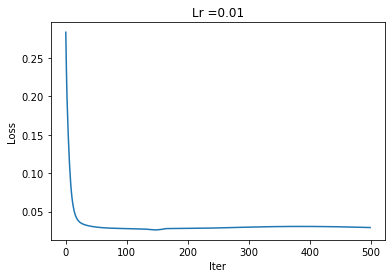

In [17]:
nn = NeuronalNetwork(x,y,0.01,[9,7,1],0.95)
nn.gradient_descent_regu(50000)

Acc: 0.9260000000000003


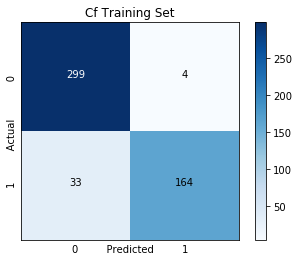

Acc: 1.0


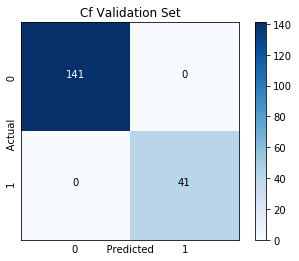

In [18]:
nn.threshold=0.90#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')

## Netwotk Development [9-5-1]

Cost after iteration 0: 0.216889
Cost after iteration 100: 0.194015
Cost after iteration 200: 0.171970
Cost after iteration 300: 0.151574
Cost after iteration 400: 0.133116
Cost after iteration 500: 0.116469
Cost after iteration 600: 0.101671
Cost after iteration 700: 0.088867
Cost after iteration 800: 0.078084
Cost after iteration 900: 0.069187
Cost after iteration 1000: 0.061945
Cost after iteration 1100: 0.056101
Cost after iteration 1200: 0.051409
Cost after iteration 1300: 0.047652
Cost after iteration 1400: 0.044645
Cost after iteration 1500: 0.042235
Cost after iteration 1600: 0.040297
Cost after iteration 1700: 0.038731
Cost after iteration 1800: 0.037457
Cost after iteration 1900: 0.036411
Cost after iteration 2000: 0.035546
Cost after iteration 2100: 0.034821
Cost after iteration 2200: 0.034207
Cost after iteration 2300: 0.033681
Cost after iteration 2400: 0.033226
Cost after iteration 2500: 0.032826
Cost after iteration 2600: 0.032472
Cost after iteration 2700: 0.032155
Cost

Cost after iteration 23000: 0.028284
Cost after iteration 23100: 0.028299
Cost after iteration 23200: 0.028315
Cost after iteration 23300: 0.028330
Cost after iteration 23400: 0.028346
Cost after iteration 23500: 0.028362
Cost after iteration 23600: 0.028379
Cost after iteration 23700: 0.028395
Cost after iteration 23800: 0.028412
Cost after iteration 23900: 0.028429
Cost after iteration 24000: 0.028446
Cost after iteration 24100: 0.028463
Cost after iteration 24200: 0.028481
Cost after iteration 24300: 0.028499
Cost after iteration 24400: 0.028516
Cost after iteration 24500: 0.028535
Cost after iteration 24600: 0.028553
Cost after iteration 24700: 0.028571
Cost after iteration 24800: 0.028590
Cost after iteration 24900: 0.028609
Cost after iteration 25000: 0.028628
Cost after iteration 25100: 0.028648
Cost after iteration 25200: 0.028667
Cost after iteration 25300: 0.028687
Cost after iteration 25400: 0.028707
Cost after iteration 25500: 0.028727
Cost after iteration 25600: 0.028747
C

Cost after iteration 46200: 0.036092
Cost after iteration 46300: 0.036145
Cost after iteration 46400: 0.036198
Cost after iteration 46500: 0.036252
Cost after iteration 46600: 0.036305
Cost after iteration 46700: 0.036359
Cost after iteration 46800: 0.036414
Cost after iteration 46900: 0.036468
Cost after iteration 47000: 0.036523
Cost after iteration 47100: 0.036579
Cost after iteration 47200: 0.036635
Cost after iteration 47300: 0.036691
Cost after iteration 47400: 0.036748
Cost after iteration 47500: 0.036805
Cost after iteration 47600: 0.036863
Cost after iteration 47700: 0.036921
Cost after iteration 47800: 0.036980
Cost after iteration 47900: 0.037039
Cost after iteration 48000: 0.037099
Cost after iteration 48100: 0.037160
Cost after iteration 48200: 0.037221
Cost after iteration 48300: 0.037283
Cost after iteration 48400: 0.037346
Cost after iteration 48500: 0.037409
Cost after iteration 48600: 0.037474
Cost after iteration 48700: 0.037539
Cost after iteration 48800: 0.037605
C

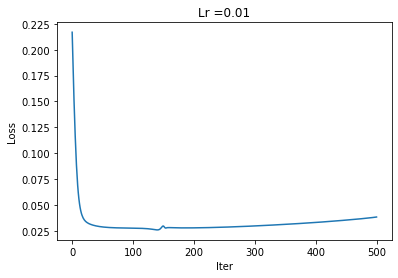

In [23]:
nn = NeuronalNetwork(x,y,0.01,[9,5,1],0.95)
nn.gradient_descent_regu(50000)

Acc: 0.9140000000000003


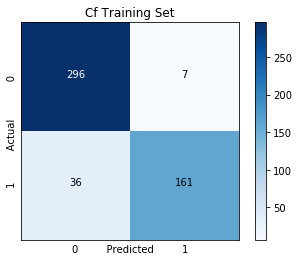

Acc: 0.9835164835164835


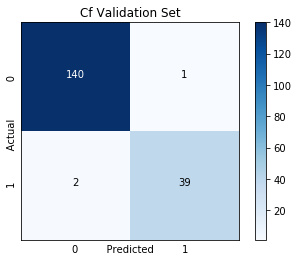

In [24]:
nn.threshold=0.90#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')